In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os

In [2]:
path = r'C:\Users\emman\OneDrive\Documents\Instacart Basket Analysis (Oct-22)'

In [3]:
df2 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'normal_data.pkl'))

In [4]:
# creating a crosstab containing orders_day_of_week by householdsize columns
shopping = pd.crosstab(index=df2.orders_day_of_week, columns=df2.household_size)

In [5]:
#calling shopping
shopping

household_size,medium family,single household,small family
orders_day_of_week,,,
0,1489437,1477078,1472719
1,1362820,1362350,1338837
2,1019060,1002581,1004790
3,918747,917042,921774
4,904116,905259,907389
5,1001099,1014174,1011157
6,1077237,1061197,1076595


In [6]:
# creating a shopping_hour crosstab containing order_hour_of_day and house_size columns
shopping_hour = pd.crosstab(df2['order_hour_of_day'], df2['household_size'])

In [7]:
#calling shopping_hour
shopping_hour

household_size,medium family,single household,small family
order_hour_of_day,,,
0,52225,51434,53258
1,27920,26731,27407
2,15935,16732,16105
3,12370,12375,11978
4,12692,12205,12121
5,21684,21284,19673
6,70519,70870,69213
7,215012,220071,215495
8,418005,415947,410812


In [8]:
# loyalty_flag by household_size
loyal_household = pd.crosstab(df2['loyalty_flag'], df2['household_size'])

In [9]:
#calling loyalty_household
loyal_household

household_size,medium family,single household,small family
loyalty_flag,,,
Loyal customer,2582679,2588844,2553601
New customer,1196502,1201265,1196061
Regular customer,3993335,3949572,3983599


#### Visualization to show the distribution of profiles

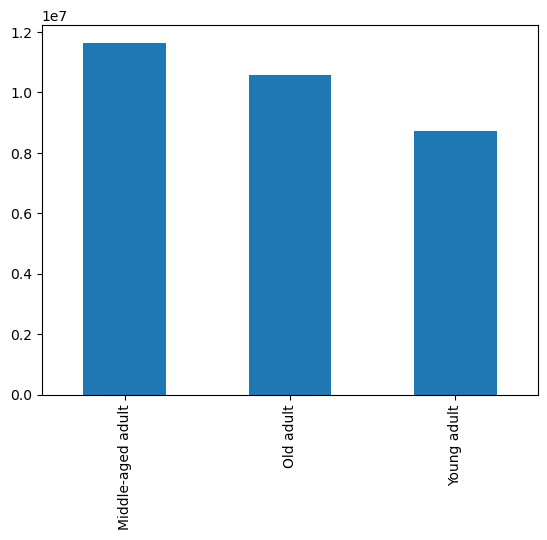

In [10]:
# Creating a bar chart for the age_group
bar1 = df2 ['age_group'].value_counts().plot.bar()

##### The bar chart above shows that most of the customers are middle-age and old adult agroups, middle-aged adult taking the larger share, followed by young adult.

In [11]:
# Exporting bar1 chart
bar1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_group.png'))

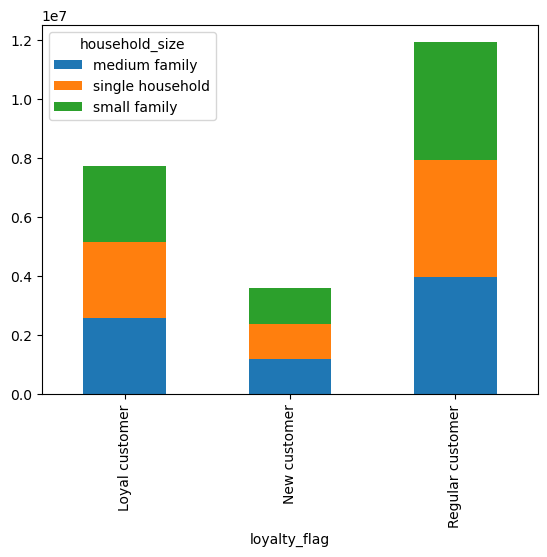

In [12]:
# Age region bar chart 
bar2 = loyal_household.plot(kind= 'bar', stacked = True)

###   Most of customers are in the regular customer category. From the regular customers, majority of them are middle family size (having 2-3 number of dependants). Single households are also more loyal customers compared to other groups of customers. 

In [13]:
# Exporting bar2 chart
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyal_household.png'))

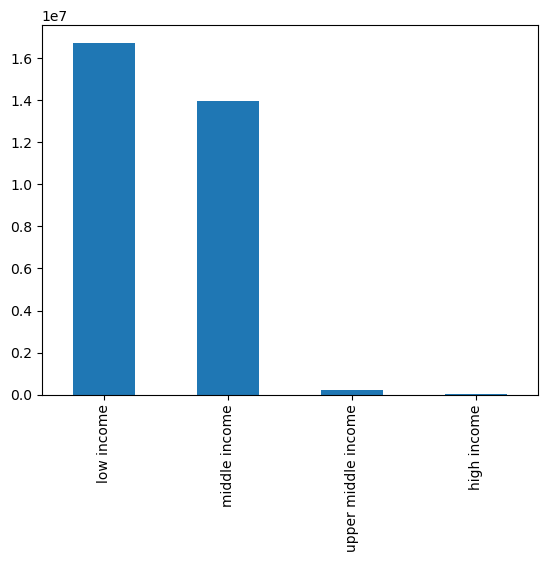

In [14]:
# Bar chart customer by income group
bar3 = df2['income_group'].value_counts().plot.bar()

###  The bar chart shows that majority of customers are low income (<USD 100,000) and middle income (USD between 100,000-200,000) customers. There are few customers that are upper middle income (btween USD200,000-400,000) and high income (>USD 400,000).

In [15]:
# Exporting bar3 chart above
bar3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_group.png'))

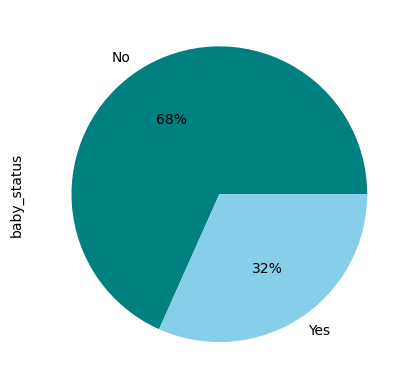

In [16]:
# Creating a pie chart for the baby_status column
pie1 = df2['baby_status'].value_counts().plot.pie(labels=['No', 'Yes'], autopct=('%1.f%%'), colors=['teal','skyblue'])

### The pie chart shows that 31% of the total products sold are babies products.

In [17]:
# Exporting pie1
pie1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'baby_satus.png'))

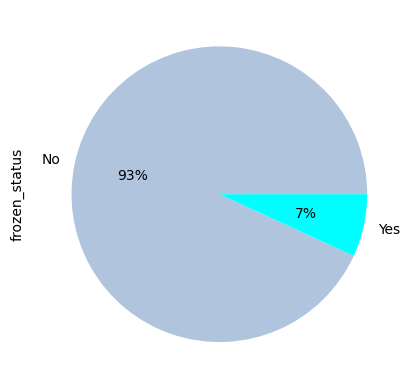

In [18]:
# Creating a pie chart for the frozen_status column
pie2 = df2['frozen_status'].value_counts().plot.pie(labels=['No', 'Yes'], autopct=('%1.f%%'), colors=['lightsteelblue','cyan'])

### the pie chart shows that 7% of the total products sold are frozen items. 

In [19]:
# Exporting pie2 above 
pie2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'frozen_status.png'))

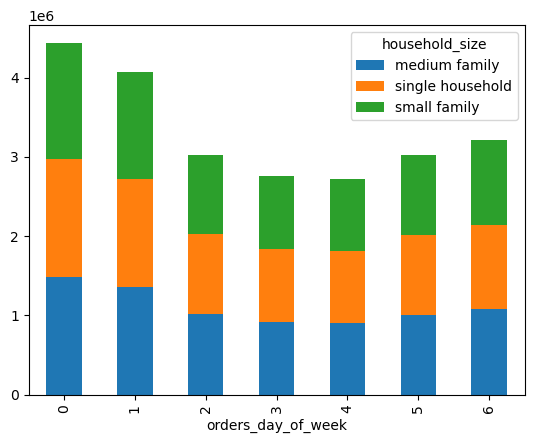

In [20]:
# Order day of the week by household size
bar4 = shopping.plot(kind= 'bar', stacked = True)

### The bar chart shows that all size of households are busy shopping on Saturday.

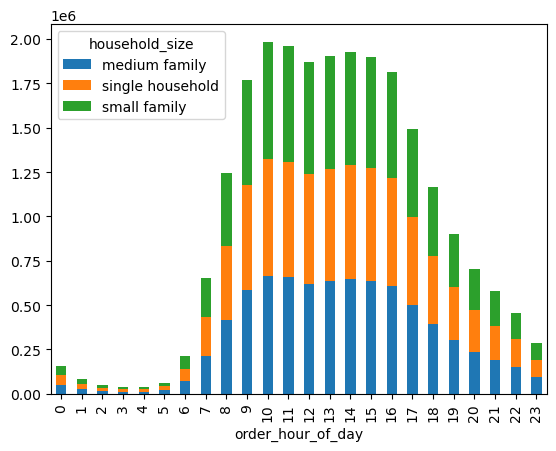

In [21]:
# Creating a bar chart for household size by order_our_of_day column
bar5 = shopping_hour.plot(kind= 'bar', stacked = True)

 
- The bar chart shows that most of the orders come in between 10-16 o'clock (10am-4pm) regardless of customers' family size.


  -  Starting from 7 o'clock onwards orders start to rise up and reamin high until 15 o'clock (3pm). After 3pm, they start to decline. 
  

- And during 0-6 o'clock (mid-night to 6am) orders reach the most minimum record. 


- As we can see from the bar chart above, the distribution is skewed to the right, i.e., mean > median. 

In [22]:
# Exporting bar5 chart above
bar5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'HH_shopping_hour.png'))

### Q8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

### Q9. Produce suitable charts to illustrate your results and export them in your project folder.

## Customers age group by region

In [23]:
# defining regions as list objects
northeast=['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
midwest=['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
south=['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
west=['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [24]:
# creating an empty list and for loop logic
result=[]

for value in df2['state']:
    if value in northeast:
        result.append('Northeast')
    elif value in midwest:
        result.append('Midwest')
    elif value in south:
        result.append('South')
    elif value in west:
        result.append('West')

In [25]:
# creating the region column based on the for loop results
df2['regions']=result

In [26]:
age_region=pd.crosstab(df2['age_group'], df2['regions'])

In [27]:
# caling age_region
age_region

regions,Midwest,Northeast,South,West
age_group,,,,
Middle-aged adult,2787659,2028982,3839307,2995307
Old adult,2455443,1884229,3521421,2713411
Young adult,2018411,1551474,2950411,2218509


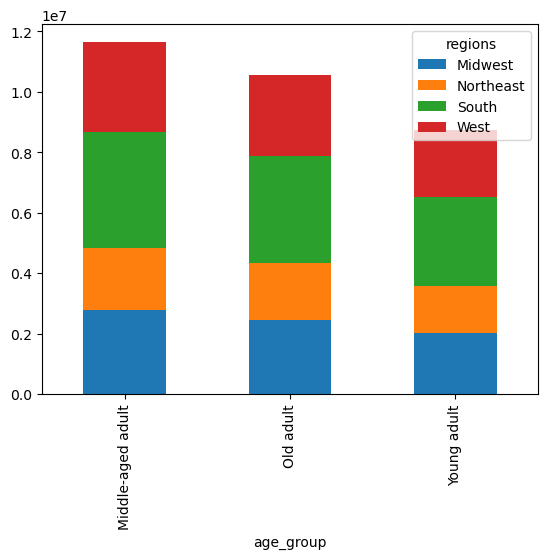

In [28]:
# Creating a bar chart for age_region crosstab
bar6 = age_region.plot(kind= 'bar', stacked = True)

### customer age groups are proportional across regions. However, the South region happened to have relatively more number of customers for all the age groups.

In [29]:
#Exporting bar6 chart
bar6.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_ageGroup_region.png'))

### Customers age group by department

In [30]:
# Creating age_dept crosstab
age_dept=pd.crosstab(df2['department'], df2['age_group'])

In [31]:
# Calling age_dept
age_dept

age_group,Middle-aged adult,Old adult,Young adult
department,,,
alcohol,54646,47596,42385
babies,158189,138738,113465
bakery,421351,382446,317031
beverages,970842,883669,717390
breakfast,251682,227751,191417
bulk,12403,11424,9624
canned goods,380448,344447,287179
dairy eggs,1943144,1762512,1471526
deli,376636,343335,283863


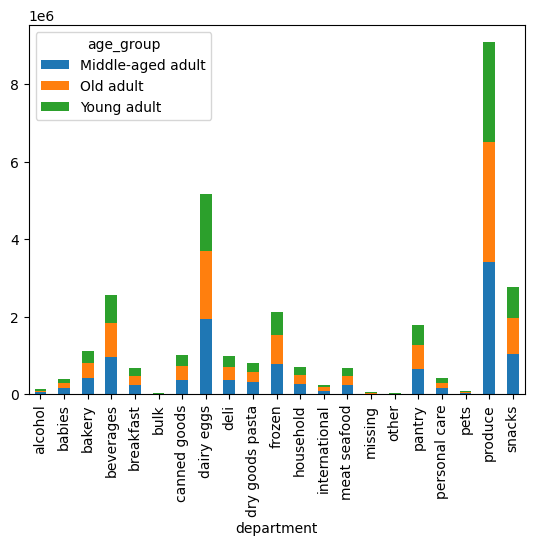

In [32]:
# Creatinga bar chart for age_dept crosstab
bar7 = age_dept.plot(kind= 'bar', stacked = True)

- the bar chart shows that the produce department has registered the highest sale across all age groups followed by dairy eggs, snacks and beverages departments respectively. 
 
   - Most of customers for produce and dairy eggs departments are middle-aged adults followed by old adults and young adults.
    
   - Most of the customers for the beverages department are middle-aged adults followed by young adults and old adults.

In [33]:
# Exporting bar7 chart above
bar7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group.png'))

## Customers' household size by department

In [34]:
# Creating a cross tab for household_size and department columns
HHsize_dept=pd.crosstab(df2['department'], df2['household_size'])

In [35]:
HHsize_dept

household_size,medium family,single household,small family
department,,,
alcohol,37333,36827,34668
babies,102585,103328,104574
bakery,279822,281395,279221
beverages,640927,645341,646886
breakfast,167322,166432,167854
bulk,8403,8000,8475
canned goods,255325,251020,252716
dairy eggs,1296264,1294376,1288883
deli,252592,253382,249967


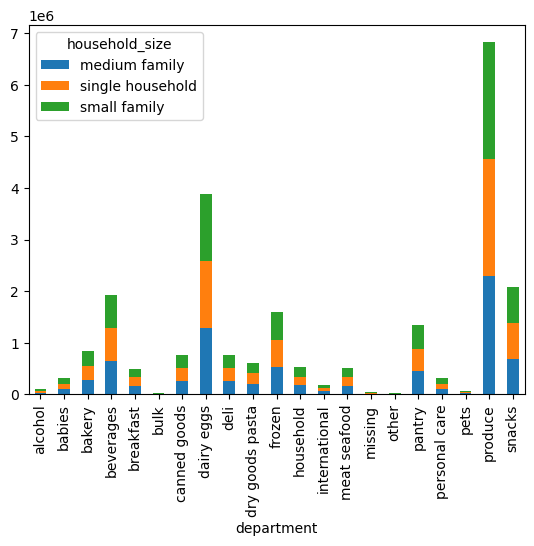

In [36]:
# Creating a bar chart for HHsize_dept cross tab
bar11 = HHsize_dept.plot(kind= 'bar', stacked = True)

 - Produce department: most of customers are single households followed by small families and medium families
 - Dairy eggs department: most of customers are  medium families followed by single households and small families 
 - Snacks department: most of customers are small families followed by medium families and single households
 
 - Bulk, Pets and Alcohol departments have the lowest customers number.

In [37]:
# Exporting bar11 chart above
bar11.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'HHsize_dept.png'))

# Analysis for further inputs to support my findings 

In [38]:
# Creating crosstab for department_id, department, price_range_loc columns
pd.crosstab([df2['department_id'], df2['department']], df2['price_range_loc'])

,price_range_loc,High-range product,Low-range product,Mid-range product
department_id,department,,,
1,frozen,0,647617,1474114
2,other,0,15259,19152
3,bakery,0,274986,845842
4,produce,0,2585708,6493565
5,alcohol,0,33046,111581
6,international,0,73203,182788
7,beverages,0,814697,1757204
8,pets,0,28165,64895
9,dry goods pasta,0,284346,537790


In [39]:
# Analyzing the mean,max and min of reordered of each products
df2.groupby('department').agg({'reordered':['mean','min', 'max']})

reordered        
                     mean min max
department                       
alcohol          0.590166   0   1
babies           0.591220   0   1
bakery           0.644934   0   1
beverages        0.669548   0   1
breakfast        0.577357   0   1
bulk             0.589788   0   1
canned goods     0.473826   0   1
dairy eggs       0.686309   0   1
deli             0.624485   0   1
dry goods pasta  0.477434   0   1
frozen           0.558728   0   1
household        0.418078   0   1
international    0.382396   0   1
meat seafood     0.585137   0   1
missing          0.409369   0   1
other            0.422510   0   1
pantry           0.359807   0   1
personal care    0.334148   0   1
pets             0.619170   0   1
produce          0.666655   0   1
snacks           0.589307   0   1

In [40]:
# crossing department and loyalty_flag variables
loyal_dept =pd.crosstab(df2['department'], df2['loyalty_flag'])

In [41]:
#Calling loyal_dept
loyal_dept

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,38723,28629,77275
babies,167108,46708,196576
bakery,379873,172104,568851
beverages,855017,396649,1320235
breakfast,221577,106179,343094
bulk,13834,4149,15468
canned goods,294594,180196,537284
dairy eggs,1830707,750056,2596419
deli,324046,158335,521453


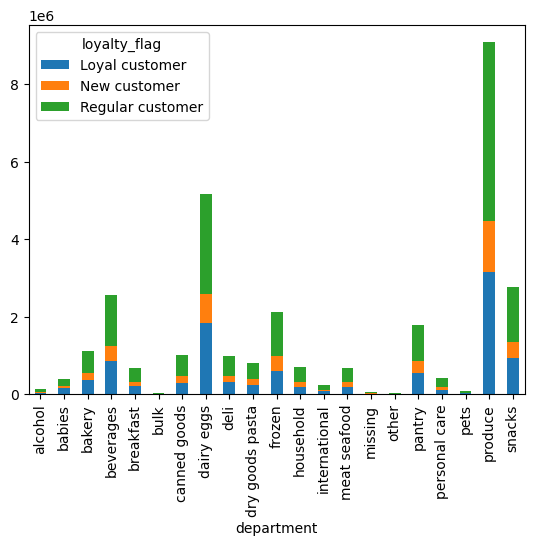

In [42]:
# Creating a bar chart for loyal_dept cross tab
bar12 = loyal_dept.plot(kind= 'bar', stacked = True)

 - for all the departments, regular customers are the top customers that order the most.

In [43]:
 #crossing price_range_loc and price_range_loc columns
pd.crosstab(df2['price_range_loc'], df2['loyalty_flag'])

loyalty_flag,Loyal customer,New customer,Regular customer
price_range_loc,,,
High-range product,119936,65927,212090
Low-range product,3214690,1501288,4958862
Mid-range product,6949467,3236480,10705824


 - Regular customers order the most for all the products' price range, followed by loyal customers and new customers

In [44]:
 ## crossing price_range_loc and price_range_loc columns
priceRange_loyal=pd.crosstab(df2['orders_day_of_week'], df2['loyalty_flag'])

In [45]:
#calling priceRange_loyal
priceRange_loyal

loyalty_flag,Loyal customer,New customer,Regular customer
orders_day_of_week,,,
0,1754731,984879,3169000
1,1843401,818902,2749383
2,1352343,625288,2047075
3,1266495,560418,1842622
4,1292042,535931,1797021
5,1456715,587718,1989296
6,1318366,690559,2282379


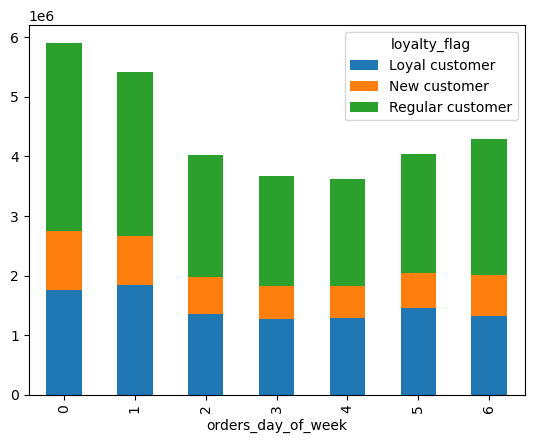

In [46]:
# Creating a bar chart for loyal_dept cross tab
bar13 = priceRange_loyal.plot(kind= 'bar', stacked = True)

- Regular order the most in all the days, followed by loyal and new customers

In [47]:
# Exporting bar13 chart above
bar13.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'priceRange_loyal.png'))

In [48]:
 ## crossing loyalty_flag and grequency_flag columns
pd.crosstab(df2['frequency_flag'], df2['loyalty_flag'])

loyalty_flag,Loyal customer,New customer,Regular customer
frequency_flag,,,
Frequent customer,10279960,1293294,9631222
Non-frequent customer,0,1983500,911475
Regular customer,4133,1526901,5334079


- Reqular customers are the most frequency buying customers, new customers and loyal customers. Majority of loyal customers are frequent buyers. None of them are non-frequent customers. 

In [49]:
df2.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,marital_status,income,activity,age_group,income_group,department,baby_status,frozen_status,household_size,regions
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,married,40423,normal,Young adult,low income,beverages,0,0,medium family,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,married,40423,normal,Young adult,low income,beverages,0,0,medium family,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,married,40423,normal,Young adult,low income,beverages,0,0,medium family,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,married,40423,normal,Young adult,low income,beverages,0,0,medium family,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,married,40423,normal,Young adult,low income,beverages,0,0,medium family,South


In [50]:
df2.shape

(30964564, 42)